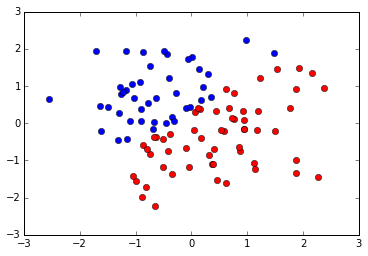

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
np.random.seed(0)

def phi(x, y):
    return np.array([x, y, 1])

def h(x, y):
    return -3 * x + 3 * y - 1

N = 100
X = np.random.randn(N, 2)
T = np.array([1 if h(x, y) > 0 else -1 for x, y in X])
plt.plot(X[:,0][T == 1], X[:,1][T == 1], 'bo')
plt.plot(X[:,0][T == -1], X[:,1][T == -1], 'ro')

In [ ]:
import random
w = np.zeros(3)
while True:
    misses = 0
    x = [i for i in range(N)]
    random.shuffle(x)
    for n in x:
        x_n, y_n = X[n]
        t_n = T[n]
        predict = np.sign((w * phi(x_n, y_n)).sum())
        if predict != t_n:
            w += t_n * phi(x_n, y_n)
            misses += 1
    if misses == 0:
        break
print(w)

[-6.02406865  6.17613824 -2.        ]


In [ ]:
seq = np.arange(-3, 3, 0.02)
xlist, ylist = np.meshgrid(seq, seq)
zlist = np.array([np.sign((w * phi(x, y)).sum()) for x, y in zip(xlist, ylist)])
plt.pcolor(xlist, ylist, zlist, alpha=0.2, edgecolors='white')
plt.plot(X[T== 1,0], X[T== 1,1], 'o', color='red')
plt.plot(X[T==-1,0], X[T==-1,1], 'o', color='blue')
plt.show()